In [39]:
from google.colab import drive
ROOT = "/content/drive" 
drive.mount(ROOT) 

from os.path import join
PROJ = "My Drive/PyTorch/"
PROJECT_PATH = join(ROOT, PROJ)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import torch
import numpy as np
import torchvision
from torchvision import transforms
from tqdm import tqdm
from torch import Tensor
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from torch import cuda, nn, optim
from torch.nn import functional as F
from torch.autograd import Variable

In [0]:
import torchvision.models as models
import skimage
import tensorflow as tf
from skimage.transform import resize
from tqdm import tqdm

In [0]:
alexnet = models.alexnet(pretrained=True)

In [0]:
# Read the given cifar 10 dataset
train_cifar = pd.read_pickle(PROJECT_PATH+'scifar10/train_CIFAR.pickle')
test_cifar = pd.read_pickle(PROJECT_PATH+'scifar10/test_CIFAR.pickle')

In [0]:
y_train = train_cifar['Y']
y_test = test_cifar['Y']

In [45]:
# Extract features
print(train_cifar.keys())

dict_keys(['Y', 'X'])


In [0]:
class CIFAR(Dataset):
  def __init__(self, a, pval_avail=False):
    self.data = a
    self.to_tensor = transforms.ToTensor()
    self.normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

  def __len__(self):
    return self.data.shape[0]

  def __getitem__(self, idx):
    img = self.data[idx, :]
    img = img.reshape(3, 32, 32)
    img = resize(img, (3, 224, 224))
    img = self.to_tensor(img)
    img = img.permute(1, 0, 2).float()
    img = self.normalize(img)
    return img

In [0]:
train_cifar = CIFAR(train_cifar['X'])

In [0]:
test_cifar = CIFAR(test_cifar['X'])

In [0]:
train_dataloader = DataLoader(train_cifar, batch_size=64)

In [0]:
test_dataloader = DataLoader(test_cifar, batch_size=64)

In [51]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
alexnet.to(device)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [52]:
# Training features ...

for i, data in tqdm(enumerate(train_dataloader)):
  if(i==0):
    model_output = alexnet(data.to(device))
    feat = model_output.cpu().detach().numpy()
  else:
    model_output = alexnet(data.to(device))
    output = model_output.cpu().detach().numpy()
    feat = np.vstack((feat, output))






0it [00:00, ?it/s]




1it [00:01,  1.12s/it]




2it [00:02,  1.11s/it]




3it [00:03,  1.10s/it]




4it [00:04,  1.10s/it]




5it [00:05,  1.09s/it]




6it [00:06,  1.08s/it]




7it [00:07,  1.08s/it]




8it [00:08,  1.08s/it]




9it [00:09,  1.08s/it]




10it [00:10,  1.07s/it]




11it [00:11,  1.08s/it]




12it [00:12,  1.08s/it]




13it [00:14,  1.09s/it]




14it [00:15,  1.09s/it]




15it [00:16,  1.08s/it]




16it [00:17,  1.08s/it]




17it [00:18,  1.08s/it]




18it [00:19,  1.08s/it]




19it [00:20,  1.08s/it]




20it [00:21,  1.08s/it]




21it [00:22,  1.08s/it]




22it [00:23,  1.08s/it]




23it [00:24,  1.08s/it]




24it [00:25,  1.07s/it]




25it [00:27,  1.08s/it]




26it [00:28,  1.08s/it]




27it [00:29,  1.08s/it]




28it [00:30,  1.08s/it]




29it [00:31,  1.08s/it]




30it [00:32,  1.08s/it]




31it [00:33,  1.08s/it]




32it [00:34,  1.09s/it]




33it [00:35,  1.08s/it]




34it [00:36,  1.08s/it]




35it [00:37,  1.07s/it]




3

In [53]:
# Test features ...

for i, data in tqdm(enumerate(test_dataloader)):
  if(i==0):
    model_output = alexnet(data.to(device))
    test_feat = model_output.cpu().detach().numpy()
  else:
    model_output = alexnet(data.to(device))
    output = model_output.cpu().detach().numpy()
    test_feat = np.vstack((test_feat, output))






0it [00:00, ?it/s]




1it [00:01,  1.12s/it]




2it [00:02,  1.11s/it]




3it [00:03,  1.10s/it]




4it [00:04,  1.10s/it]




5it [00:05,  1.09s/it]




6it [00:06,  1.10s/it]




7it [00:07,  1.10s/it]




8it [00:08,  1.10s/it]




9it [00:09,  1.09s/it]




10it [00:10,  1.09s/it]




11it [00:12,  1.09s/it]




12it [00:13,  1.09s/it]




13it [00:14,  1.08s/it]




14it [00:15,  1.08s/it]




15it [00:16,  1.08s/it]




16it [00:17,  1.08s/it]




17it [00:18,  1.08s/it]




18it [00:19,  1.08s/it]




19it [00:20,  1.08s/it]




20it [00:21,  1.08s/it]




21it [00:22,  1.08s/it]




22it [00:23,  1.08s/it]




23it [00:24,  1.07s/it]




24it [00:26,  1.08s/it]




25it [00:27,  1.08s/it]




26it [00:28,  1.09s/it]




27it [00:29,  1.09s/it]




28it [00:30,  1.08s/it]




29it [00:31,  1.08s/it]




30it [00:32,  1.08s/it]




31it [00:33,  1.08s/it]




32it [00:33,  1.19it/s]






In [0]:
df = pd.DataFrame(feat)

In [0]:
df2 = pd.DataFrame(test_feat)

In [0]:
# df.to_csv(PROJECT_PATH+'features.csv', index=False)
# df2.to_csv(PROJECT_PATH+'test_features.csv', index=False)

In [0]:
X_train = pd.read_csv(PROJECT_PATH+'features.csv', sep=',')
X_test = pd.read_csv(PROJECT_PATH+'test_features.csv', sep=',')

# Linear SVM

In [0]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [61]:
# !pip3 install scikit-plot

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
sns.set_style(style='darkgrid')

In [0]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
# params = {
#     'C':[1e-3, 1e-2, 0.1, 1]
# }
clf = SVC(kernel='linear', C=1, probability=True)
# clf = GridSearchCV(svc, param_grid=params, n_jobs=-1, cv=5, scoring='accuracy', verbose=4)
clf.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [65]:
print(clf.score(X_test, y_test))

0.924


In [0]:
y_pred = clf.predict(X_test)

[]

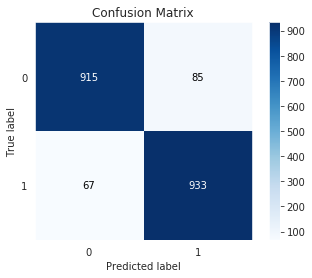

In [67]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)
plt.plot()

[]

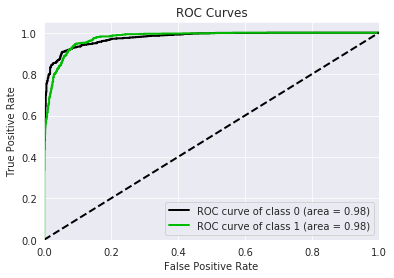

In [68]:
skplt.metrics.plot_roc(y_test, clf.predict_proba(X_test), plot_micro=False, plot_macro=False)
plt.plot()